# Лабораторная работа 6 


- Загружаем в pandas любой набор данных, в котором есть как минимум пара числовых колонок и как минимум одна категориальная с небольшим числом категорий. Опишите ваши данные, что обозначает каждый столбец, какого типа (категориальный, вещественный, целочисленный, бинарный) данный столбец, при необходимости для категориальных в том числе бинарных признаков привести расшифровку их значений. В общем, проведите "визуальный" анализ ваших данных.

In [130]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()

Подключение библиотек

In [2]:
pokemons  = pd.read_csv('Pokemon.csv', sep=',', nrows=721)

Считывание данных в датафрейм

In [3]:
pokemons.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

Визуальный анализ данных:<br>
'#' - Порядковый номер покемона (целочисленный)<br>
Name - Имя покемона (строковый)<br>
Type1 - Тип покемона (категориальный)<br>
Type2 - Дополнительный тип (категориальный)<br>
Total - Сумма всех характеристик (целочисленный)<br>
HP - Базовое значение хп (целочисленный)<br>
Attack - Базовое значение атаки (целочисленный)<br>
Defense - Базовое значение защиты (целочисленный)<br>
Sp. Atk - Базовое значение спец. атаки (целочисленный)<br>
Sp. Def - Базовое значение спец. защиты (целочисленный)<br>
Speed - Базовое значение скорости (целочисленный)<br>
Generation - Поколение (категориальный)<br>
Legendary - Легендарный/Не легендрарный (бинарный)

## Matplotlib

- Построить любой график (любого рода) с помощью чистого matplotlib / pylab

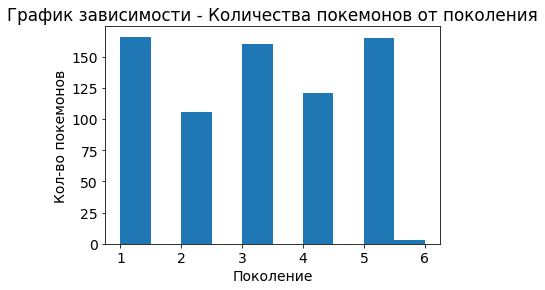

In [45]:
matplotlib.rcParams.update({'font.size': 14})

leg_count = plt.hist(pokemons['Generation'])
leg_count = plt.xlabel('Поколение')
leg_count = plt.ylabel('Кол-во покемонов')
price = plt.title('График зависимости - Количества покемонов от поколения')

- Построить несколько суб-графиков на одном графике используя .subplot.

Text(0.5, 1.0, 'Сравнение суммы статов первых 5 покемонов')

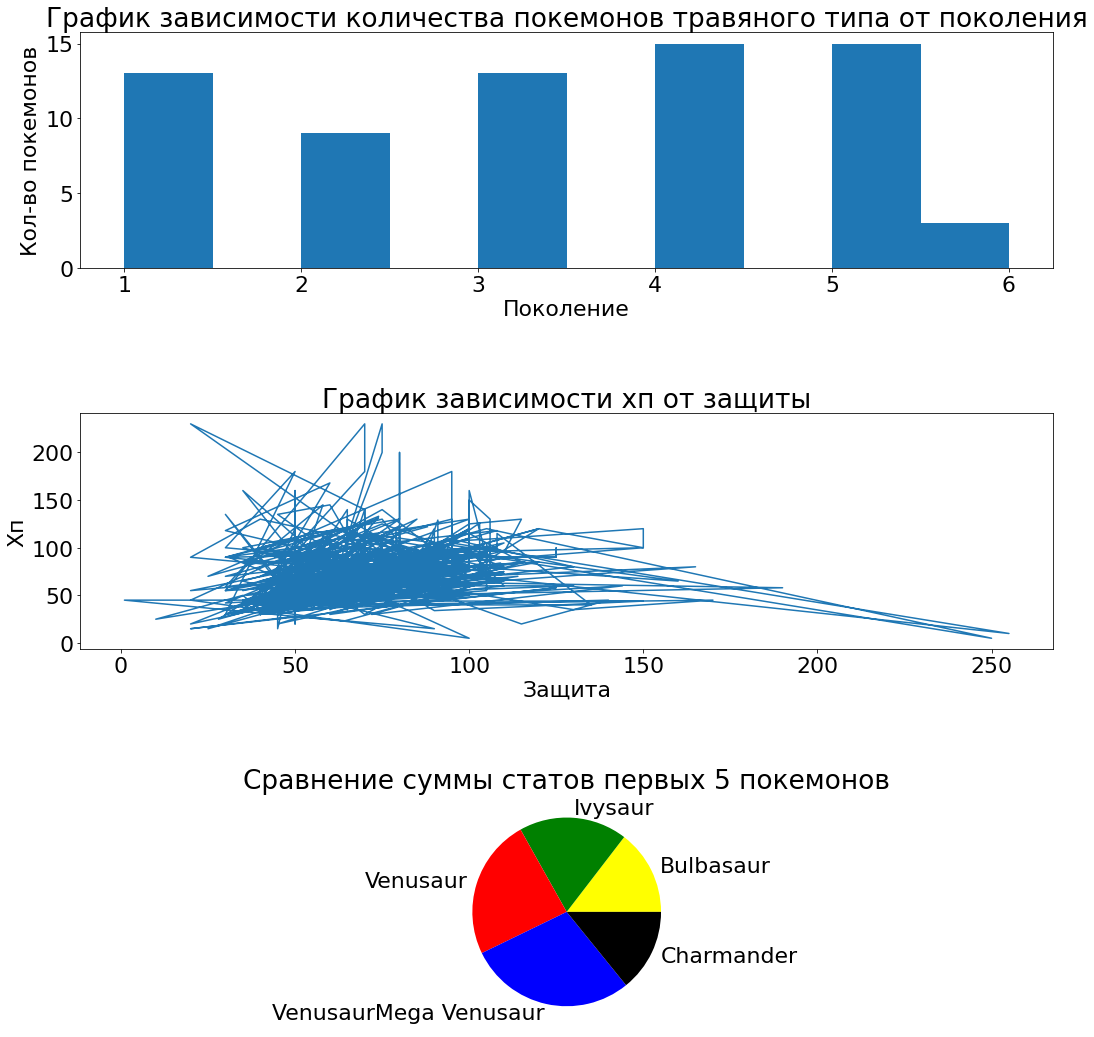

In [43]:
figure, axis = plt.subplots(3, 1, figsize=(15, 15))
figure.tight_layout(h_pad=5)
axis[0].hist(pokemons[pokemons['Type 1'] == 'Grass']['Generation'])
axis[0].set_title("График зависимости количества покемонов травяного типа от поколения")
axis[0].set_xlabel('Поколение')
axis[0].set_ylabel('Кол-во покемонов')

axis[1].plot(pokemons['HP'],pokemons['Defense'])
axis[1].set_title('График зависимости хп от защиты')
axis[1].set_xlabel('Защита')
axis[1].set_ylabel('Хп')

labels = pokemons.head()['Name']
values = pokemons.head()['Total']
colors = ['yellow','green','red','blue', 'black']

axis[2].pie(values,labels=labels,colors=colors)
axis[2].set_title('Сравнение суммы статов первых 5 покемонов')

# pandas.DataFrame.plot / Series.plot

- На основе Вашего датасета построить три разных вида графиков используя pandas.DataFrame.plot / Series.plot (мануал) Среди графиков должен присутствовать один boxplot (обязательно надо использовать параметр by, для исследования взаимосвязи числовой переменной и какой-либо другой). Графики должны быть построены как через методы DataFrame, так и через методы Series. То есть оба варианта нужно продемонстрировать.

C:\Users\Bell_e601\AppData\Local\Temp\ipykernel_22244\1060126046.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



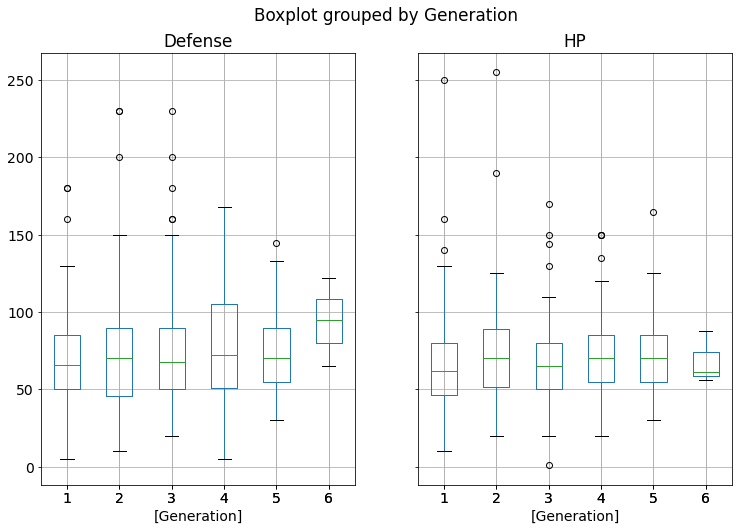

In [48]:
fig, ax = plt.subplots(figsize=(12,8))

df = pokemons[['HP','Defense','Generation']].copy()
bp = df.boxplot(by='Generation', ax=ax)

boxplot для исследования взаимосвязи Защиты и Хп, сгрупированных по поколению

<AxesSubplot:ylabel='Frequency'>

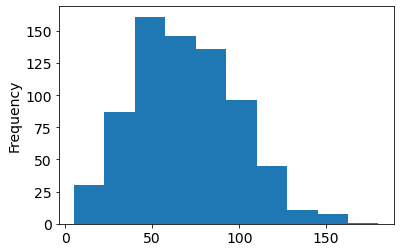

In [54]:
pokemons['Speed'].plot(kind='hist')

Гистограмма частот скоростей, посторенная с помощью Series

<AxesSubplot:ylabel='Density'>

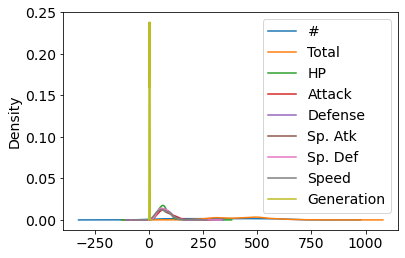

In [56]:
pokemons.plot(kind='density')

Плотность распределения всех числовых величин, построенная с помощью датафрейма

# Seaborn

-  Построить .pairplot с помощью seaborn на каком-либо наборе данных, проанализировав взаимосвязь набора числовых переменных

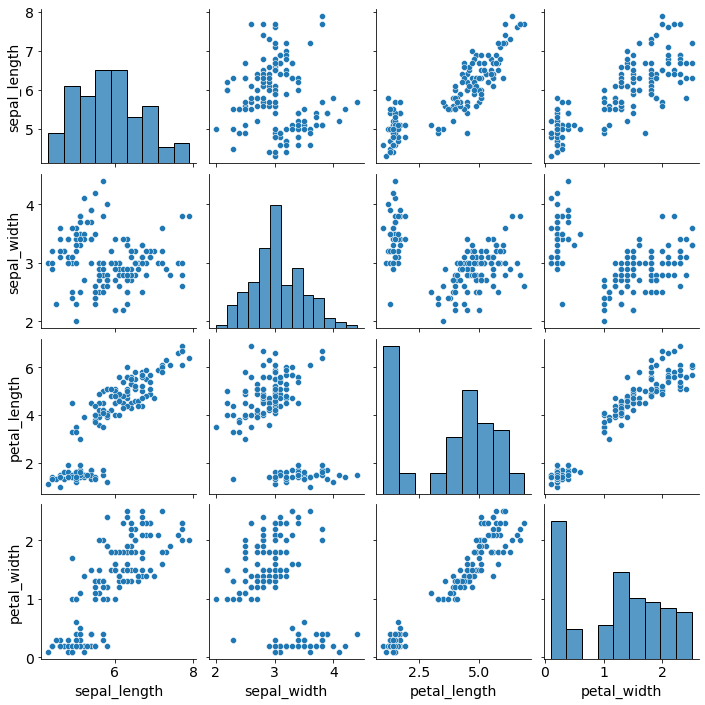

In [66]:
df = sns.load_dataset('iris')
sns.pairplot(df)

Взаимосвязь каждой числовой переменной с другой числовой переменной

- Построить .jointplot, проанализировав взаимосвязь двух конкретных числовых переменных

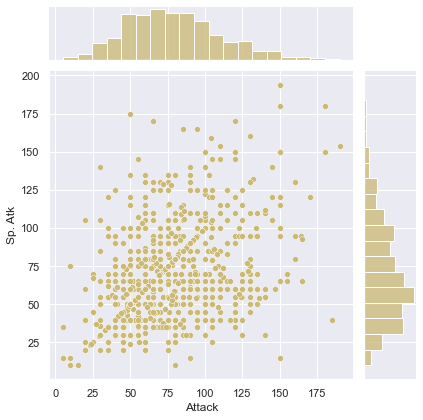

In [106]:
ax = sns.jointplot(x=pokemons['Attack'], y=pokemons['Sp. Atk'], color='y')

На графике видно, что в среднем с увеличением атаки растёт и спец. атака

- Построить .boxplot или .violinplot на каком-либо наборе данных, проанализировав какой-то числовой показатель в разрезе категориального

<AxesSubplot:xlabel='sepal_length', ylabel='species'>

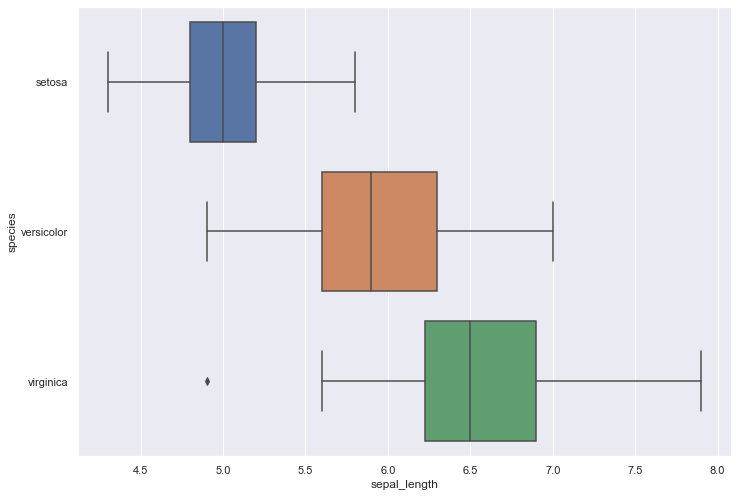

In [110]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x="sepal_length", y="species")

На этом графике видно, что у Ириса сорта Setosa длина чашелистика меньше, чем у остальный сортов, а у сорта Virginica - больше.

-  Построить график heatmap попарной корреляции всех числовых признаков (категориальные признаки убираете из графика)

<AxesSubplot:>

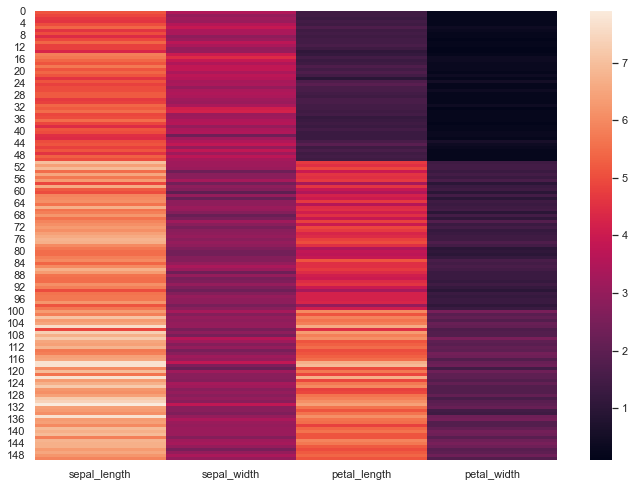

In [111]:
sns.heatmap(df.select_dtypes(include='float64'))

Попарная корреляция всех числовых признаков

- Построить любой график (связанный с вашими данными) с помощью plotly

In [135]:
pokemons['Type 1'].iplot(kind='hist', xTitle='Тип', yTitle='Количество', title='Распределение основного типа')
